In [1]:
from ROOT import TFile
from ROOT import TH2D
from ROOT import TCanvas, TPad, TLegend, TLatex
from array import array
from itertools import product

Welcome to JupyROOT 6.24/06


In [2]:
# aliases
fPOG_2016preVFP = "2016preVFP/Muon/Efficiencies_muon_generalTracks_Z_Run2016_UL_HIPM_ID.root"
fPOG_2016postVFP = "2016postVFP/Muon/Efficiencies_muon_generalTracks_Z_Run2016_UL_ID.root"
fPOG_2017 = "2017/Muon/Efficiencies_muon_generalTracks_Z_Run2017_UL_ID.root"
fPOG_2018 = "2018/Muon/Efficiencies_muon_generalTracks_Z_Run2018_UL_ID.root"

fREP_2016preVFP = "2016preVFP/Muon/Effi_POGMedium.root"
fREP_2016postVFP = "2016postVFP/Muon/Effi_POGMedium.root"
fREP_2017 = "2017/Muon/Effi_POGMedium.root"
fREP_2018 = "2018/Muon/Effi_POGMedium.root"

In [21]:
fPOG = TFile.Open(fPOG_2018)
fREP = TFile.Open(fREP_2018)

hPOG = fPOG.Get("NUM_MediumID_DEN_TrackerMuons_abseta_pt_efficiencyData")
hREP = fREP.Get("muonEffi_data_eta_pt")

In [22]:
eta_bins = array('d', [0., 0.9, 1.2, 2.1, 2.4])
pt_bins = array('d', [15., 20., 25., 30., 40., 50., 60., 120.])
ratio = TH2D("ratio", "", len(eta_bins)-1, eta_bins, len(pt_bins)-1, pt_bins)

In [23]:
for (eta, pt) in product(eta_bins, pt_bins):
    if eta == 2.4 or pt == 120.:
        continue
    effPOG = hPOG.GetBinContent(hPOG.FindBin(eta, pt))
    effREP = hREP.GetBinContent(hREP.FindBin(eta, pt))
    err = hPOG.GetBinError(hPOG.FindBin(eta, pt))
    deviation = (effREP-effPOG)/err
    print(pt, eta, ((effREP-effPOG)/effPOG)*100, "%")
    ratio.SetBinContent(ratio.FindBin(eta, pt), (effREP-effPOG)/effPOG)

15.0 0.0 -0.02013741475300938 %
20.0 0.0 0.015584666752821264 %
25.0 0.0 0.015098108811857391 %
30.0 0.0 0.002535147528843149 %
40.0 0.0 -0.0002277484863992685 %
50.0 0.0 0.006577060718443228 %
60.0 0.0 -0.007273405041536894 %
15.0 0.9 0.013035064425293171 %
20.0 0.9 0.010192119917452933 %
25.0 0.9 -0.010866515456660284 %
30.0 0.9 -0.0035460842465855767 %
40.0 0.9 0.008681256999752075 %
50.0 0.9 0.02384337765080084 %
60.0 0.9 -0.007105538326092868 %
15.0 1.2 0.16149922950138457 %
20.0 1.2 0.0050336372917518715 %
25.0 1.2 0.004849766855727887 %
30.0 1.2 0.00553698960020438 %
40.0 1.2 0.004931545354276017 %
50.0 1.2 -9.704087247944008e-06 %
60.0 1.2 -0.0031139794861344766 %
15.0 2.1 0.2749740836477816 %
20.0 2.1 0.06207647685510501 %
25.0 2.1 0.057271698897256085 %
30.0 2.1 0.024448262220543113 %
40.0 2.1 0.004177838286274493 %
50.0 2.1 0.021707721361997376 %
60.0 2.1 0.5090632314483846 %


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


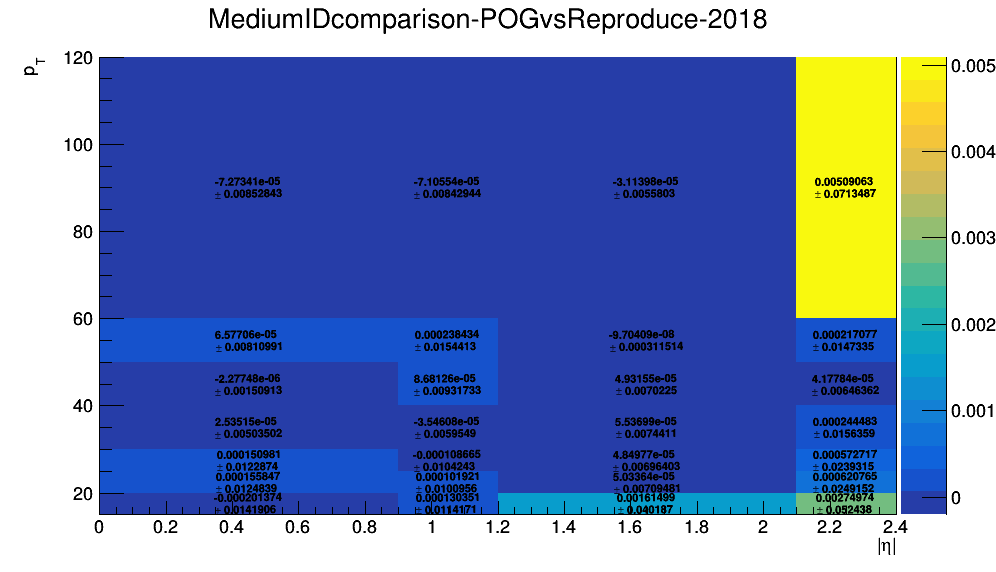

In [25]:
ratio.SetStats(0)
ratio.SetTitle("MediumIDcomparison-POGvsReproduce-2018")
ratio.GetXaxis().SetTitle("|#eta|")
ratio.GetYaxis().SetTitle("p_{T}")

cvs = TCanvas("cvs", "", 1000, 600)
cvs.cd()
ratio.Draw("colz&texte")
cvs.Draw()